In [1]:
# [1] Импортируем всё необходимое.
import tensorflow as tf
import keras as k
from keras.models import load_model as l_m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Необходимо для обучения. Подключать НЕОБЯЗАТЕЛЬНО!
# В случае, если хотите протестировать обучение - добро пожаловать!
# Тогда измените путь до csv файла на свой.

# Чтение БД, созданной собственноручно.
data_frame = pd.read_csv("train5.csv")

input_names = ["aa","ab","ac","ad","ae",
               "ba","bb","bc","bd","be",
               "ca","cb","cc","cd","ce",
               "da","db","dc","dd","de",
               "ea","eb","ec","ed","ee"]

output_names = ["isCycle:"] 

In [3]:
# Нормализация данных.

# Формирование словаря столбцов тренировочного набора
def data_frame_to_dict(df):
    result = dict()
    for column in df.columns:
        values = data_frame[column].values
        result[column] = values
    return result

# Разделения входного вектора тренировочных данных и выхода
def make_supervised(df):
    raw_input_data = data_frame[input_names]
    raw_output_data = data_frame[output_names]
    return{"inputs":data_frame_to_dict(raw_input_data),
           "outputs":data_frame_to_dict(raw_output_data)}

In [4]:
# Делаем каждый элемент списком, чтобы потом соединить их в строчки входных и 
# выходных данных из базы данных с помощью функции zip
def encode(data):
    vectors = []
    for data_name, data_values in data.items():
        encoded = list(map(lambda dn: [dn], data_values))
        vectors.append(encoded)
        
    formatted = []
    for vector_raw in list(zip(*vectors)):
        vector = []
        for element in vector_raw:
            for e in element:
                vector.append(e)
        formatted.append(vector)
    return formatted

In [5]:
# Разделение получившегося словаря на массивы входных и выходных данных 
# (которые уже нормализовали)
supervised = make_supervised(data_frame)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))

In [6]:
# Определение входных и выходных данных, тестов, а также самой нейронной сети.
train_x = encoded_inputs[:999500]
train_y = encoded_outputs[:999500]

test_x = encoded_inputs[999500:]
test_y = encoded_outputs[999500:]

In [18]:
# Как видно, в нашей нейронной сети 2 слоя соответственно с 25 и 1 нейроном,
# Функция активации первого слоя - relu. Второго, для нормализации выхода,
# sigmoid. Метод вычисления ошибки - mse (средн. кв. ошибки). Оптимизатор 
# обучения - adam. Метрики - accuracy (точность).
model = k.Sequential()
model.add(k.layers.Dense(units = 25, activation="relu"))
model.add(k.layers.Dense(units = 1, activation="sigmoid"))
model.compile(loss = "mse", optimizer="adam", metrics=["accuracy"])

In [19]:
# Обучение, НЕОБЯЗАТЕЛЬНО!
# (не через colab, все выполняли на родном компуктере :3)
# Обучение долгое из-за миллиона строк данных, так что не советую запускать,
# лучше перейдите в конец файла и запустите блок, который выполняет загрузку 
# существующей нейронной сети.
fit_result = model.fit(x = train_x, y = train_y, epochs = 30, validation_split = 0.2)

Epoch 1/30
24988/24988 [==============================] - 57s 2ms/step - loss: 0.0299 - accuracy: 0.9687 - val_loss: 0.0077 - val_accuracy: 0.9924
Epoch 2/30
24988/24988 [==============================] - 57s 2ms/step - loss: 0.0059 - accuracy: 0.9942 - val_loss: 0.0052 - val_accuracy: 0.9947
Epoch 3/30
24988/24988 [==============================] - 65s 3ms/step - loss: 0.0045 - accuracy: 0.9954 - val_loss: 0.0039 - val_accuracy: 0.9958
Epoch 4/30
24988/24988 [==============================] - 67s 3ms/step - loss: 0.0038 - accuracy: 0.9959 - val_loss: 0.0035 - val_accuracy: 0.9963
Epoch 5/30
24988/24988 [==============================] - 153s 6ms/step - loss: 0.0034 - accuracy: 0.9963 - val_loss: 0.0032 - val_accuracy: 0.9966
Epoch 6/30
24988/24988 [==============================] - 204s 8ms/step - loss: 0.0031 - accuracy: 0.9966 - val_loss: 0.0030 - val_accuracy: 0.9966
Epoch 7/30
24988/24988 [==============================] - 207s 8ms/step - loss: 0.0028 - accuracy: 0.9968 - val_loss

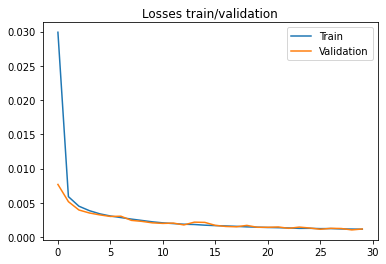

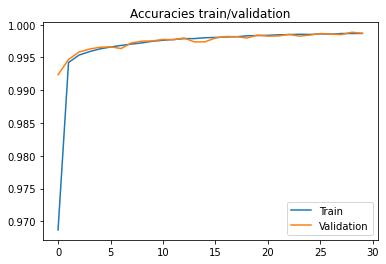

In [20]:
# Вывод статистики обучения.
plt.title("Losses train/validation")
plt.plot(fit_result.history["loss"], label = "Train")
plt.plot(fit_result.history["val_loss"], label = "Validation")
plt.legend()
plt.show()

plt.title("Accuracies train/validation")
plt.plot(fit_result.history["accuracy"], label = "Train")
plt.plot(fit_result.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [9]:
# Пример поведения с неизвестными данными.
# (последние 500 не обрабатывали, потому и проверяем тут)
predicted_test = model.predict(test_x)
real_data = data_frame.iloc[999500:][input_names + output_names]
real_data["isCycle"] = predicted_test
print(real_data)

        aa  ab  ac  ad  ae  ba  bb  bc  bd  be  ...  dc  dd  de  ea  eb  ec  \
999500   0   1   0   0   1   0   0   0   0   0  ...   0   0   1   0   1   0   
999501   1   1   0   0   0   1   0   1   0   0  ...   0   0   0   0   0   0   
999502   1   1   0   1   1   0   1   1   1   1  ...   1   1   1   0   1   0   
999503   0   1   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   1   
999504   1   0   1   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
999995   1   0   0   1   0   0   0   0   0   0  ...   0   1   0   0   0   0   
999996   1   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   0   0   
999997   0   0   1   0   0   0   1   0   0   1  ...   1   0   0   0   0   0   
999998   0   0   1   0   1   0   0   0   0   0  ...   1   0   0   0   0   0   
999999   1   0   0   1   1   1   0   1   0   1  ...   0   1   1   1   1   1   

        ed  ee  isCycle:       isCycle  
999500   0

In [10]:
# Точность модели с неизвестными данными
y = model.predict(test_x)
y2 = tf.cast(tf.round(y), dtype = np.int32).numpy()
test_acc = len(test_y[test_y == y2]) / test_y.shape[0]*100
print(test_acc)

99.8


In [11]:
# [2] Можете попробовать свои примеры ниже!
# Измените путь до h5 файла(файл обученной нейронной сети) на свой. 
model = l_m('find_cycle_in_5x5.h5')
example = np.array([1,0,0,0,0,
                    0,1,0,0,0,
                    0,0,1,0,0,
                    0,0,0,1,0,
                    0,0,0,0,1])
x = tf.reshape(tf.cast(example, tf.float32), [-1, 25])
print(model.predict(x))

[[1.2032247e-15]]


In [12]:
example = np.array([1,0,0,0,0,
                    0,1,0,0,0,
                    0,0,1,0,0,
                    0,1,0,1,1,
                    0,0,1,1,1])
x = tf.reshape(tf.cast(example, tf.float32), [-1, 25])
print(model.predict(x))

[[0.71591455]]


In [24]:
# Сохранение обученной нейронной сети:
# model.save('find_cycle_in_5x5.h5')